In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [10]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
class_name = ['not spam', 'span']
label_to_class = {
    0: "not spam",
    1: "spam"
}

class_to_label = {
    value: key
    for key, value in label_to_class.items()
}

print(x, x.shape)
print(y, y.shape)
print("targets:", [label_to_class[i] for i in y])
print(label_to_class)
print(class_to_label)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)
[0 0 0 0 1 1 1 1 1 1] (10,)
targets: ['not spam', 'not spam', 'not spam', 'not spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam']
{0: 'not spam', 1: 'spam'}
{'not spam': 0, 'spam': 1}


In [12]:
# define model
model = LogisticRegression(
    solver="liblinear",
    random_state=11
)
model

LogisticRegression(random_state=11, solver='liblinear')

In [13]:
model.fit(x,y)

LogisticRegression(random_state=11, solver='liblinear')

In [14]:
print("classes:", model.classes_)
print("weights:", model.coef_)
print("bias:", model.intercept_)
print("n iteration:", model.n_iter_)

classes: [0 1]
weights: [[0.51491375]]
bias: [-1.04608067]
n iteration: [6]


In [15]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [19]:
prediction = model.predict(x)
print("prediction:", prediction)
print("targets:", y)
print()
print("prediction_to_class:",
    [label_to_class[i] for i in prediction]
)
print("target class:",
    [label_to_class[i] for i in y]
)

prediction: [0 0 0 1 1 1 1 1 1 1]
targets: [0 0 0 0 1 1 1 1 1 1]

prediction_to_class: ['not spam', 'not spam', 'not spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam']
target class: ['not spam', 'not spam', 'not spam', 'not spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam']


In [18]:
model_score = model.score(x, y)
print("score:",model_score)

score: 0.9


In [20]:
confusion_matrix(y, prediction)

array([[3, 1],
       [0, 6]])

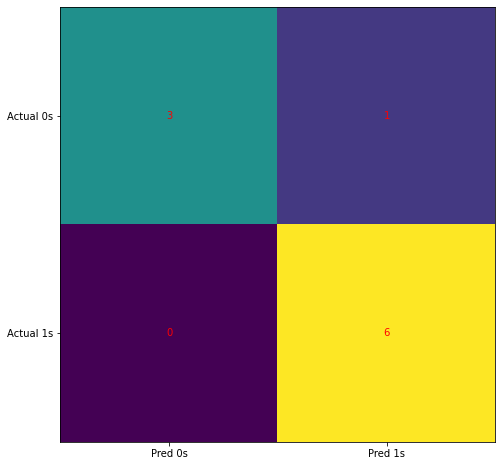

In [25]:
cm = confusion_matrix(y, prediction)

fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=("Pred 0s", "Pred 1s"))
ax.yaxis.set(ticks=(0,1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red')
plt.show()

In [26]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [27]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [31]:
x, y = load_digits(return_X_y=True)

In [32]:
print("dataset shape:", x.shape)
print("target shape:", y.shape)

dataset shape: (1797, 64)
target shape: (1797,)


In [33]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size=0.2, random_state=0)
print("training set shape:", x_train.shape)
print("test set shape:", x_test.shape)

training set shape: (1437, 64)
test set shape: (360, 64)


In [37]:
print("before scaling data:")
print(x_train[:5])
print(x_test[:5])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("after scaling data:")
print(x_train[:5])
print(x_test[:5])

before scaling data:
[[ 0.  0.  0.  9. 15.  2.  0.  0.  0.  0.  5. 16. 11.  1.  0.  0.  0.  0.
  13. 15.  1.  0.  0.  0.  0.  2. 16. 11.  0.  0.  0.  0.  0.  2. 16. 11.
   4.  4.  0.  0.  0.  2. 15. 16. 16. 14. 10.  1.  0.  0.  9. 16.  7.  3.
  15.  6.  0.  0.  0.  7. 15. 16. 16.  6.]
 [ 0.  3. 12. 12. 14.  4.  0.  0.  0.  1. 13.  4.  4.  0.  0.  0.  0.  4.
  14.  4.  3.  0.  0.  0.  0.  5. 13. 12. 14. 10.  0.  0.  0.  0.  0.  0.
   0. 11.  6.  0.  0.  0.  0.  0.  0.  4.  8.  0.  0.  0.  6.  2.  0.  8.
   8.  0.  0.  2. 13. 16. 16. 16.  2.  0.]
 [ 0.  1. 10. 15. 16. 13.  3.  0.  0.  5. 14.  5.  5. 15.  8.  0.  0.  0.
   0.  0.  2. 15.  6.  0.  0.  0.  0.  0.  9. 16.  0.  0.  0.  0.  0.  0.
   9. 16.  0.  0.  0.  0.  0.  0.  4. 16.  6.  0.  0.  0.  2.  3. 13. 12.
   0.  0.  0.  0. 15. 13.  7.  0.  0.  0.]
 [ 0.  0.  0. 12.  4.  0.  0.  0.  0.  0.  6. 15.  2.  0.  0.  0.  0.  0.
  16.  5.  0.  4.  4.  0.  0.  4. 15.  2.  3. 15.  9.  0.  0.  2. 15. 16.
  16. 16.  4.  0.  0.  0.  2.  8. 16

In [38]:
model = LogisticRegression(solver="liblinear", C=0.05,
    multi_class="ovr", random_state=111
)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=111,
                   solver='liblinear')

In [40]:
print("-- training set performance --")
train_pred = model.predict(x_train)
print(classification_report(y_train, train_pred))

print("-- test set performance --")
test_pred = model.predict(x_test)
print(classification_report(y_train, train_pred))

-- training set performance --
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       151
           1       0.95      0.97      0.96       147
           2       0.98      1.00      0.99       141
           3       0.99      0.95      0.97       154
           4       0.99      0.97      0.98       151
           5       0.96      0.96      0.96       142
           6       0.98      0.98      0.98       137
           7       0.97      0.99      0.98       140
           8       0.94      0.89      0.91       135
           9       0.91      0.94      0.92       139

    accuracy                           0.96      1437
   macro avg       0.96      0.96      0.96      1437
weighted avg       0.96      0.96      0.96      1437

-- test set performance --
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       151
           1       0.95      0.97      0.96       147
           2       0

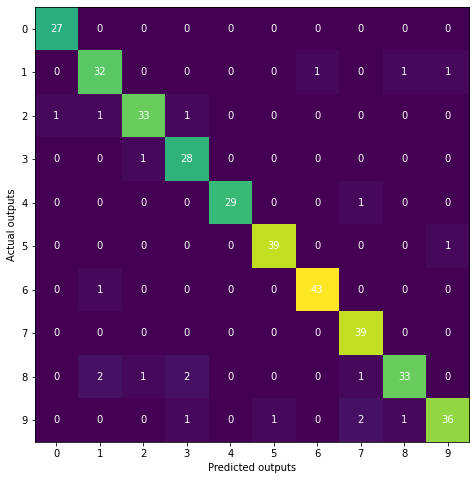

In [49]:
cm = confusion_matrix(y_test, test_pred)

fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5,-0.5)
for i in range(10):
    for j in range(10):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='white')
plt.show()

In [46]:
model.coef_.shape

(10, 64)

In [52]:
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
print(len(weather))

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
print(len(temp))

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
print(len(play))

14
14
14


In [62]:
encoder = preprocessing.LabelEncoder()
enc_weather = encoder.fit_transform(weather)
enc_temp = encoder.fit_transform(temp)
label = encoder.fit_transform(play)

print(enc_weather)
print(enc_temp)
print(label)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [63]:
features = list(zip(enc_weather, enc_temp))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [67]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)
predicted = model.predict([[0,2]])
print(predicted)

[1]
